In [1]:
!pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import FinanceDataReader as fdr

In [6]:
df = fdr.DataReader('247540', '2019')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026
2019-03-07,17369,17888,17097,17296,4126721,0.018910
2019-03-08,17295,17493,16702,17271,1910858,-0.001445
2019-03-11,17196,17369,16332,17098,1597077,-0.010017


<AxesSubplot: xlabel='Date'>

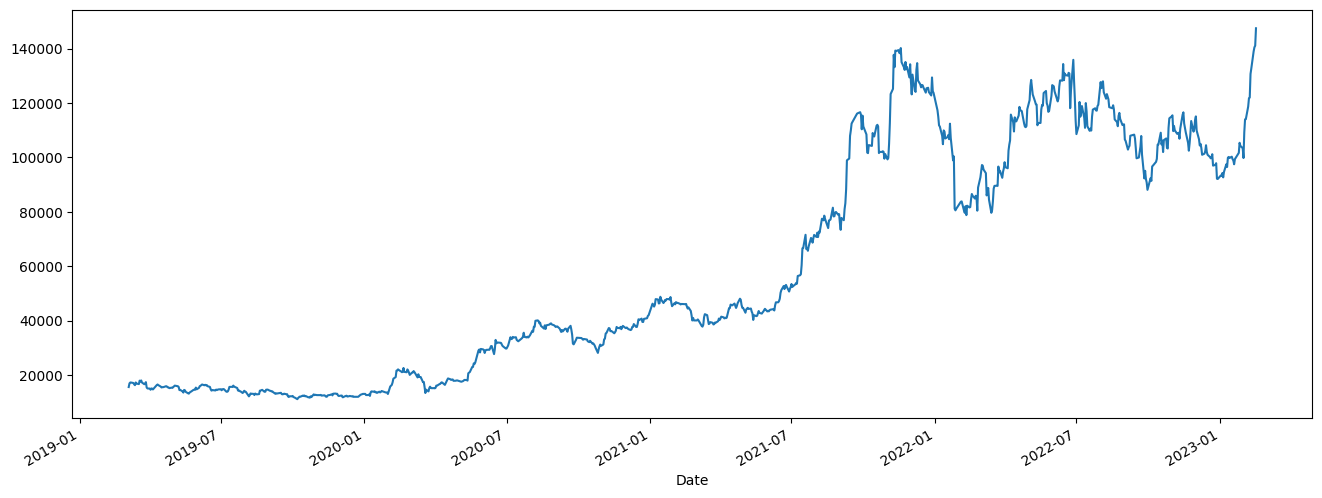

In [8]:
df['Close'].plot(figsize = (16,6))

In [ ]:
# 주식이 가격이 오른다 -> 매수량이 많다.
# 사려는 사람이 많다. -> 미래에도 오를 것이다. -> 원하는 사람이 많다. (이건 주관적)


In [11]:
df['Range'] = df['High'] - df['Low']  # 변동폭
df['yesterday_Range'] = df['Range'].shift()
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range
Date,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0


In [12]:
# 시가 대비 전날 변동성에서 절반 이상 상승 -> 사려는 사람이 많다.
df['Buy_Price'] = df['Open'] + df['yesterday_Range'] * 0.5
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price
Date,,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5


In [17]:
import numpy as np
# df['High'] >= df['Buy_Price']
df['Buy_signal'] = np.where(df['High'] >= df['Buy_Price'], 1, 0)
df.head()
# np.where : 불린일떄 자주쓰이는 함수

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_signal
Date,,,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN,NaN,0
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0


In [22]:
df['Return'] = np.where(df['Buy_signal'] == 1, df['Close'] - df['Buy_Price'], None)
df['ror'] = np.where(df['Buy_signal'] == 1, df['Close']/df['Buy_Price'] -1 , None)
df.head()


,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_signal,Return,ror
Date,,,,,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN,NaN,0,None,None
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1,360.0,0.021667
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0,None,None
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0,None,None
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0,None,None


In [25]:
df['cum_ror'] = (df['ror'] + 1).cumprod() -1
df.tail()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_signal,Return,ror,cum_ror_,cum_ror
Date,,,,,,,,,,,,,,
2023-02-10,135400,139700,128700,132700,2873415,0.015302,11000,10700.0,140750.0,0,None,None,NaN,NaN
2023-02-13,132600,142500,130400,139000,3447025,0.047476,12100,11000.0,138100.0,1,900.0,0.006517,3.611204,3.611204
2023-02-14,141900,142300,134300,140500,2241781,0.010791,8000,12100.0,147950.0,0,None,None,NaN,NaN
2023-02-15,142500,149000,139500,141100,3489156,0.004270,9500,8000.0,146500.0,1,-5400.0,-0.03686,3.441235,3.441235
2023-02-16,145500,149000,140800,147500,2323816,0.045358,8200,9500.0,150250.0,0,None,None,NaN,NaN


이전략으로 344%...

In [31]:
last_cum_ror = df['cum_ror'].dropna(axis = 0).iloc[-1]

# CAGR =  (1 + 누적수익률) ** (1/투자년도)  - 1
start_date = df.index[0]
end_date = df.index[-1]
year = (end_date - start_date).days / 365
CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(CAGR * 100, 2)} %')

CAGR : 45.77 %


### Buy & Hold vs 변동성 돌파

In [41]:
buy_and_hold = df[['Close']]
buy_and_hold['ror'] = buy_and_hold['Close'].pct_change()
buy_and_hold['cum_ror'] = (buy_and_hold['ror'] + 1).cumprod() - 1  # 누적수익률

In [42]:
buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change() # 수익률
buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1 # 누적수익률

start_date = buy_and_hold.index[0]
end_date = buy_and_hold.index[-1]
year = (end_date - start_date).days / 365

last_cum_ror = buy_and_hold['cum_ror'].dropna(axis = 0).iloc[-1]

buy_and_hold_CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(buy_and_hold_CAGR * 100, 2)} %')

CAGR : 76.4 %


C:\Users\업무용\AppData\Local\Temp\ipykernel_11752\928697336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change() # 수익률
C:\Users\업무용\AppData\Local\Temp\ipykernel_11752\928697336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1 # 누적수익률


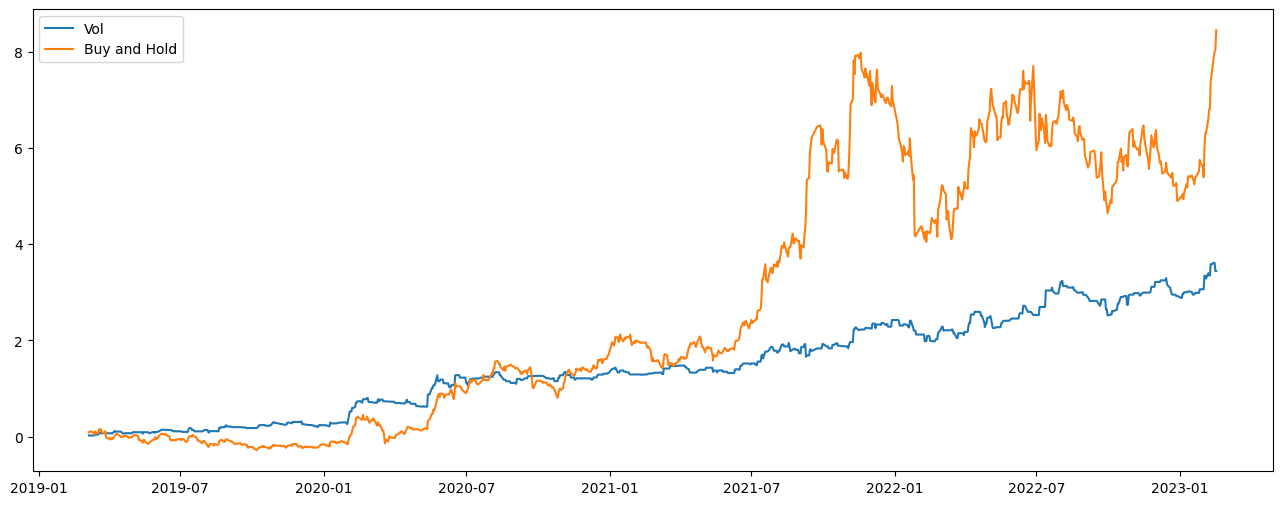

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.legend()



In [47]:
# 추세가 상승하니까 살때마다 계속 비싸게 사게되는거죠

In [48]:
# 이동평균으로 상승장 여부를 판단하여 전략 수정